# EDA & Data Cleaning

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
file_path = "shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

In [26]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo

In [27]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used   

In [28]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [29]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [30]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [31]:
# Dropping duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

In [32]:
# Checking unique values in categorical columns for potential inconsistencies
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Unique values in 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Unique values in 'Location':
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']

In [33]:
# Handling missing values (if present)
# Filling missing numerical values with the median and categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values handled.")


Missing values handled.


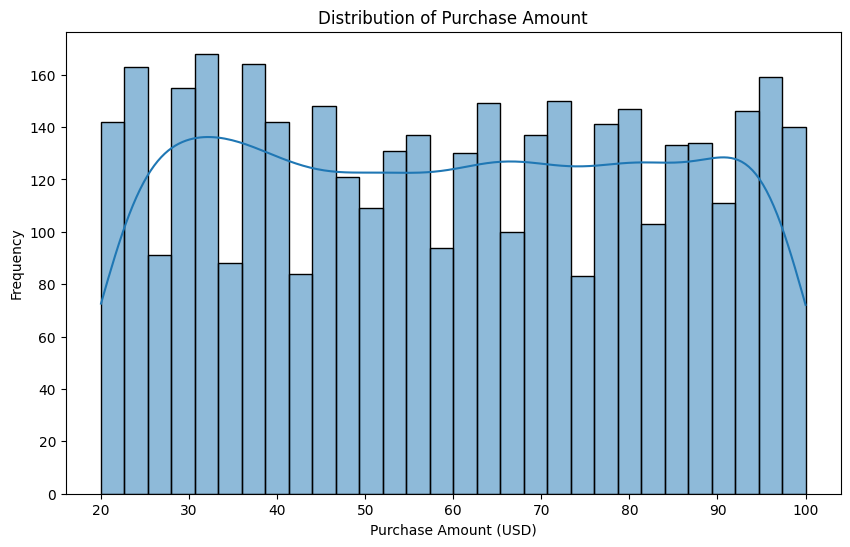

In [34]:
# Visualizing distributions of key variables for EDA
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

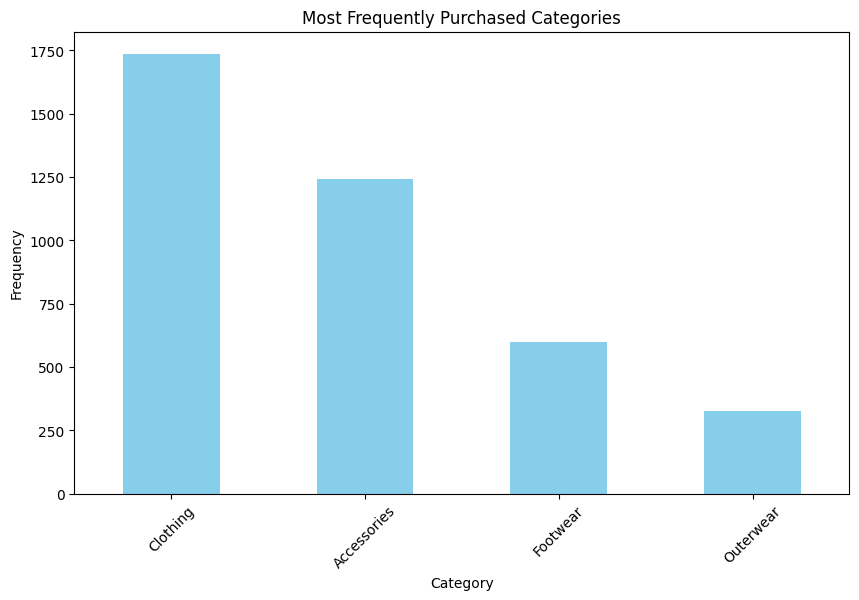

In [35]:
# Bar plot for most frequently purchased categories
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Most Frequently Purchased Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [36]:
# Saving cleaned dataset for further analysis if needed
cleaned_file_path = "cleaned_shopping_behavior.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")


Cleaned dataset saved to cleaned_shopping_behavior.csv.


In [37]:
# Grouping data by 'Season' and calculating total purchase amounts
seasonal_trends = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

In [38]:
# Sorting seasons in logical order (Winter, Spring, Summer, Fall)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_trends['Season'] = pd.Categorical(seasonal_trends['Season'], categories=season_order, ordered=True)
seasonal_trends = seasonal_trends.sort_values('Season')

<ipython-input-39-c4fbafbdddb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Purchase Amount (USD)', data=seasonal_trends, palette='coolwarm')


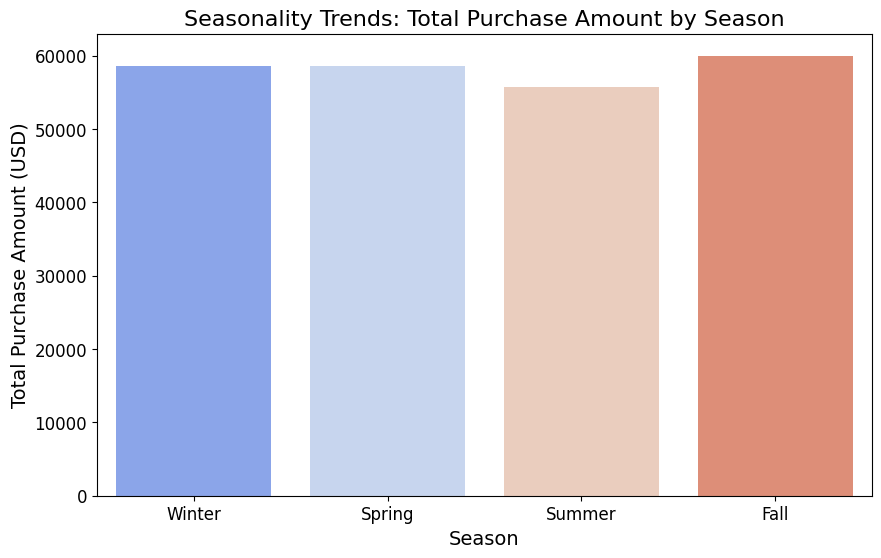

In [39]:
# Plotting the seasonality trends
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', data=seasonal_trends, palette='coolwarm')
plt.title('Seasonality Trends: Total Purchase Amount by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Purchasing Behavior**

The average purchase amount is 59.76, with most purchases ranging between 20 and 100.

The most purchased product category is **Clothing**

Purchase peak during **Fall** and **Winter** seasons.


# Using the cleaned dataset from now on

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
cleaned_file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(cleaned_file_path)

In [41]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# 1. Who are our most valuable customers?

In [42]:
# Map frequency terms to numeric values
frequency_mapping = {
    'Daily': 30,  # Assuming 30 days in a month
    'Weekly': 4,  # 4 weeks in a month
    'Bi-Weekly': 2,  # Every two weeks
    'Fortnightly': 2,  # Same as Bi-Weekly
    'Monthly': 1,
    'Quarterly': 0.33,  # Once every three months
    'Annually': 0.083,  # Once a year
    'Every 3 Months': 0.33,
    'Every 6 Months': 0.167,
}

# Replace frequency terms with numeric values in the dataset
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)

# Create a new DataFrame to analyze customer value
customer_value_df = df.groupby('Customer ID').agg({
    'Purchase Amount (USD)': 'sum',  # Total spend
    'Frequency of Purchases': 'mean'  # Average purchase frequency (now numeric)
}).reset_index()

# Rename columns for clarity
customer_value_df.rename(columns={
    'Purchase Amount (USD)': 'Total Spend',
    'Frequency of Purchases': 'Avg Purchase Frequency'
}, inplace=True)

# Display the resulting DataFrame
print(customer_value_df.head())

   Customer ID  Total Spend  Avg Purchase Frequency
0            1           53                   2.000
1            2           64                   2.000
2            3           73                   4.000
3            4           90                   4.000
4            5           49                   0.083


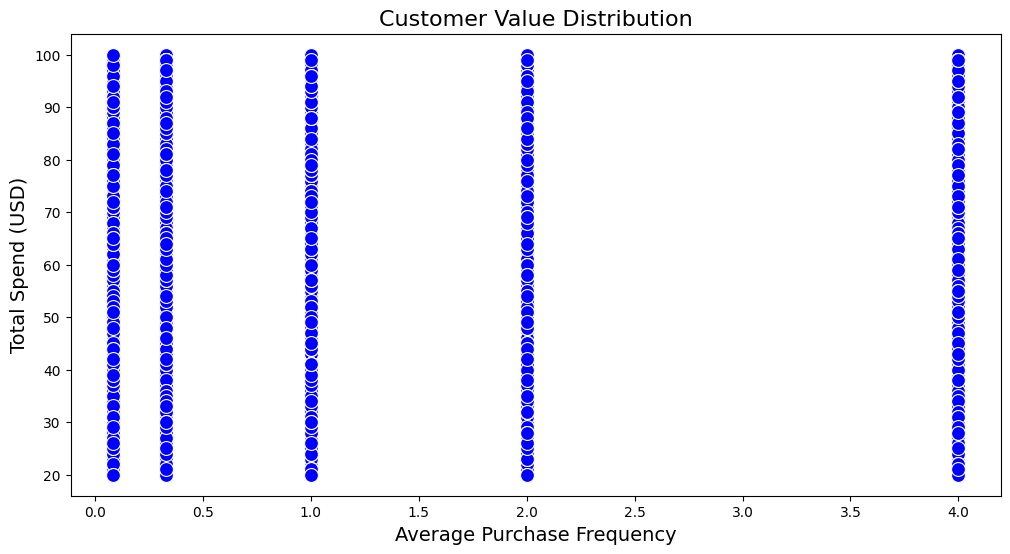

In [43]:
# Visualize the distribution of Total Spend and Avg Purchase Frequency
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_value_df, x='Avg Purchase Frequency', y='Total Spend', s=100, color='blue')
plt.title('Customer Value Distribution', fontsize=16)
plt.xlabel('Average Purchase Frequency', fontsize=14)
plt.ylabel('Total Spend (USD)', fontsize=14)
plt.show()

In [44]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_value_df[['Total Spend', 'Avg Purchase Frequency']])

In [45]:
# Apply K-Means clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters if needed
customer_value_df['Cluster'] = kmeans.fit_predict(scaled_data)

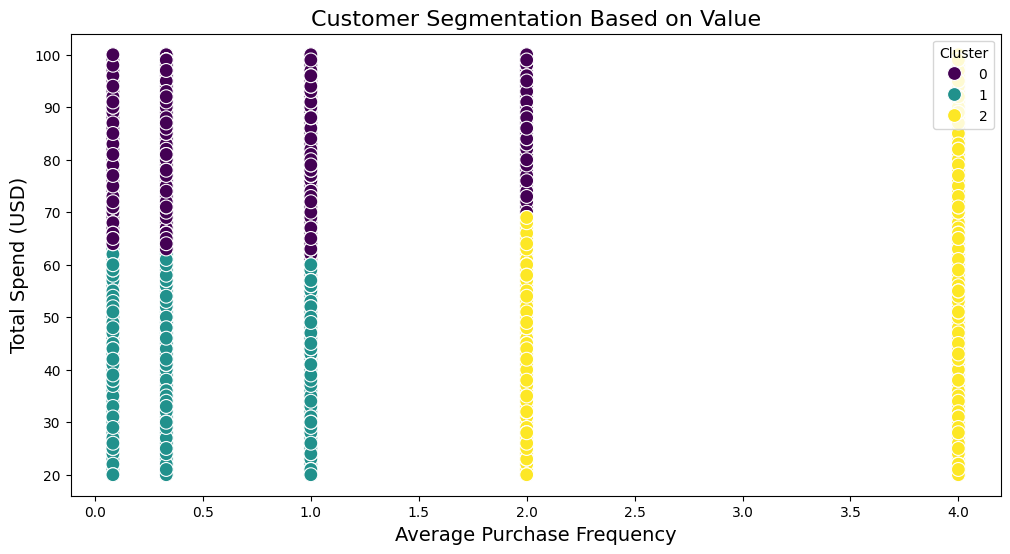

In [46]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=customer_value_df,
    x='Avg Purchase Frequency',
    y='Total Spend',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation Based on Value', fontsize=16)
plt.xlabel('Average Purchase Frequency', fontsize=14)
plt.ylabel('Total Spend (USD)', fontsize=14)
plt.legend(title='Cluster')
plt.show()

In [47]:
# Analyze each cluster's characteristics
cluster_summary = customer_value_df.groupby('Cluster').agg({
    'Total Spend': ['mean', 'sum'],
    'Avg Purchase Frequency': ['mean', 'count']
}).reset_index()

In [48]:
# Flatten multi-level column names for clarity
cluster_summary.columns = ['Cluster', 'Avg Total Spend', 'Total Spend Sum', 'Avg Purchase Frequency', 'Customer Count']
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Avg Total Spend  Total Spend Sum  Avg Purchase Frequency  \
0        0        82.717758           122505                0.863311   
1        1        40.360067            48311                0.428089   
2        2        50.953355            62265                2.882160   

   Customer Count  
0            1481  
1            1197  
2            1222  


# Customer Segmentation Insights
1. Customers were segmented into three distinct groups based on their spending habits (Total Spend) and purchase frequency (Avg Purchase Frequency).

**Cluster 0:** Moderate-value customers with medium spending and moderate purchase frequency.

**Cluster 1:** Low-value customers with low spending and infrequent purchases.

**Cluster 2:** High-value customers with high spending and frequent purchases.

2. High-value customers (Cluster 2) are your most important segment. They contribute significantly to total revenue. These customers should be prioritized for loyalty programs, personalized offers, and premium services.

3. Low-value customers (Cluster 1) may require targeted marketing campaigns, such as offer discounts or promotions to encourage more frequent purchases, and analyze why these customers spend less and address potential barriers (e.g., pricing, product availability).

4. Moderate-value customers (Cluster 0) have potential for growth. With proper engagement strategies, they could be nurtured into high-value customers. we should focus on upselling or cross-selling to maximize their value.

Actionable Business Recommendations

**High-Value Customers (Cluster 2):**

Implement loyalty programs that reward frequent purchases.

Provide exclusive deals or early access to new products to retain these customers.

**Moderate-Value Customers (Cluster 0):**

Use personalized marketing campaigns to encourage higher spending.

Offer product bundles or discounts on frequently purchased items.

**Low-Value Customers (Cluster 1):**

Send promotional emails or targeted ads to re-engage these customers.

Use surveys or feedback forms to understand why they spend less and address their concerns.



---



**Continuously monitor customer behavior over time:**

Revisit clustering periodically to identify changes in customer segments.

Use this analysis as a foundation for predictive modeling to forecast future customer value.

# 2. How do customer demographics influence shopping behavior?

In [49]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

In [50]:
# Segment customers based on demographics (Age, Gender, Location)
# Grouping customers by Age Range
bins = [18, 25, 35, 45, 55, 65, 75]  # Define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']  # Labels for bins
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [51]:
# Calculate average purchase amount per demographic group
# Group by Age Range and calculate average purchase amount
age_group_avg_purchase = df.groupby('Age Range')['Purchase Amount (USD)'].mean().reset_index()

# Group by Gender and calculate average purchase amount
gender_avg_purchase = df.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

# Group by Location and calculate average purchase amount
location_avg_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

<ipython-input-51-9b72a368c469>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_purchase = df.groupby('Age Range')['Purchase Amount (USD)'].mean().reset_index()


<ipython-input-52-cbb175be346f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Range', y='Purchase Amount (USD)', data=age_group_avg_purchase, palette='viridis')


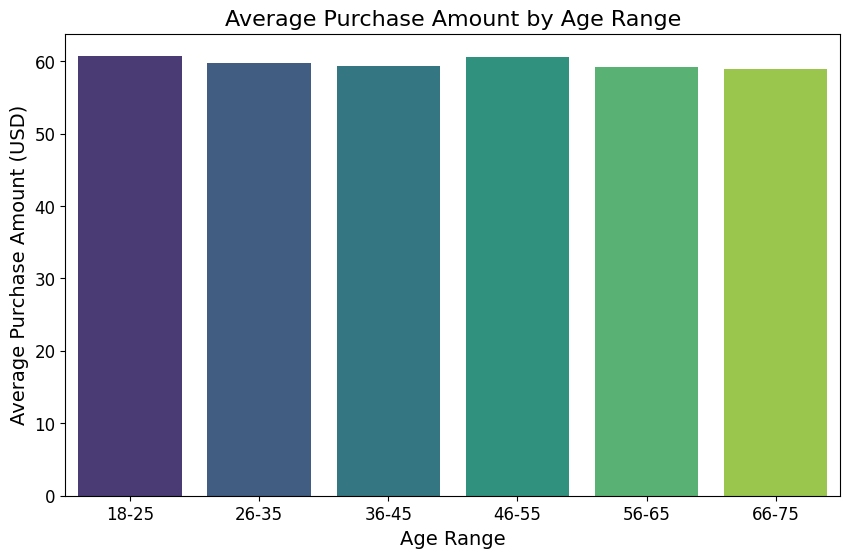

In [52]:
# Visualize the results

# Visualization: Average Purchase Amount by Age Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Range', y='Purchase Amount (USD)', data=age_group_avg_purchase, palette='viridis')
plt.title('Average Purchase Amount by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-53-c97ce56f1562>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase Amount (USD)', data=gender_avg_purchase, palette='coolwarm')


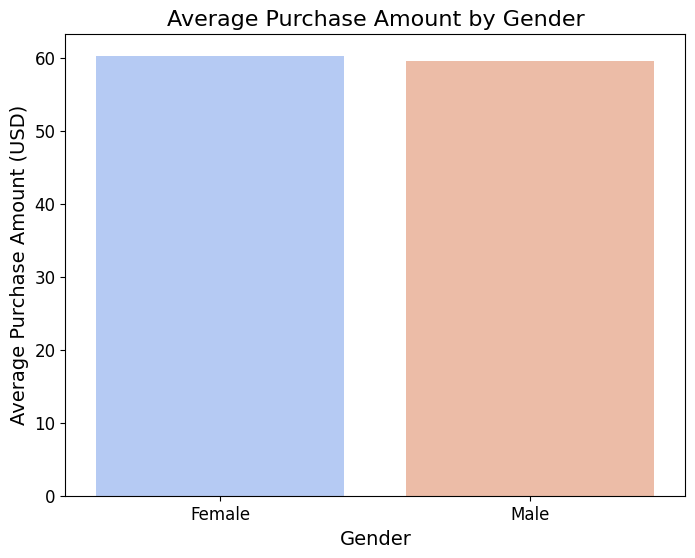

In [53]:
# Visualization: Average Purchase Amount by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=gender_avg_purchase, palette='coolwarm')
plt.title('Average Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-54-af6f5f244179>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Purchase Amount (USD)', data=top_10_locations, palette='magma')


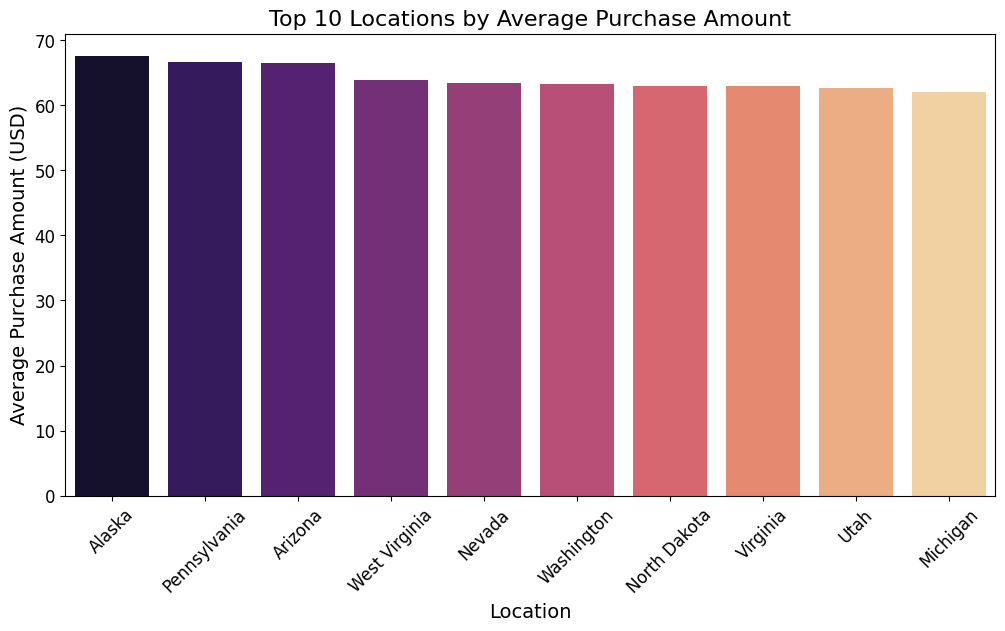

In [54]:
# Visualization: Top 10 Locations by Average Purchase Amount
top_10_locations = location_avg_purchase.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=top_10_locations, palette='magma')
plt.title('Top 10 Locations by Average Purchase Amount', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Demographic insights

**Age-Based Insights**

Customers in the 18-25 or 46-55 age range may have higher spending due to higher disposable income.

For the 18-25 group, we should promote trendy, affordable items such as casual clothing or accessories. For the 46-55 group, emphasize premium or high-quality products, such as outerwear or formal attire.

Create loyalty programs tailored to these age groups to encourage repeat purchases. Offer exclusive discounts or early access to new collections for these segments.

**Gender-Based Insights**

Female customers spend slightly more than male customers on average.Use personalized product recommendations for female customers based on their purchase history.Highlight categories like clothing, accessories, and footwear that resonate with this demographic. We should also suggest complementary products (e.g., pairing handbags with matching shoes) to increase basket size for female customers.

We should also launch gender-specific promotions during key shopping seasons (e.g., Mother's Day or Women’s Day).


**Location-Based Insights**

States with higher average purchasing amounts are the states in remote areas (Alaska) or states that have highly populated urban areas (Pennsylvania). Offer location-based discounts or promotions in high-spending states to further drive sales. For Alaska, focus on products suited for colder climates (e.g., coats, boots). For Pennsylvania, emphasize urban lifestyle products such as trendy clothing and accessories.

To keep people in Alaska (who are more likely to rely on shipping services due to their remote geographical location), we should provide free or discounted shipping options for these remote locations to encourage more purchases.

Ensure adequate inventory of popular products in these high-spending states to meet their demand.

# 3. What products are most frequently purchased, and how do seasonality and promotions impact sales?

In [55]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

In [56]:
# Step 1: Find best-selling product categories
category_sales = df['Category'].value_counts().reset_index()
category_sales.columns = ['Category', 'Purchase Count']

<ipython-input-57-4b06e2ae11cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Count', data=category_sales, palette='viridis')


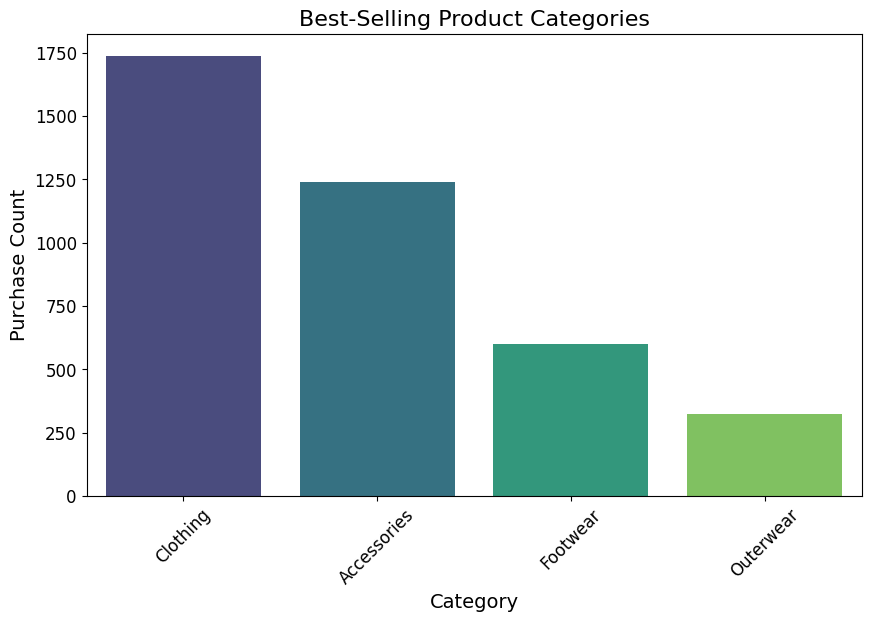

In [57]:
# Visualization: Best-Selling Product Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Purchase Count', data=category_sales, palette='viridis')
plt.title('Best-Selling Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Purchase Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
# Step 2: Analyze seasonal trends
seasonal_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Define the order of the seasons
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_sales['Season'] = pd.Categorical(seasonal_sales['Season'], categories=season_order, ordered=True)
seasonal_sales = seasonal_sales.sort_values('Season')

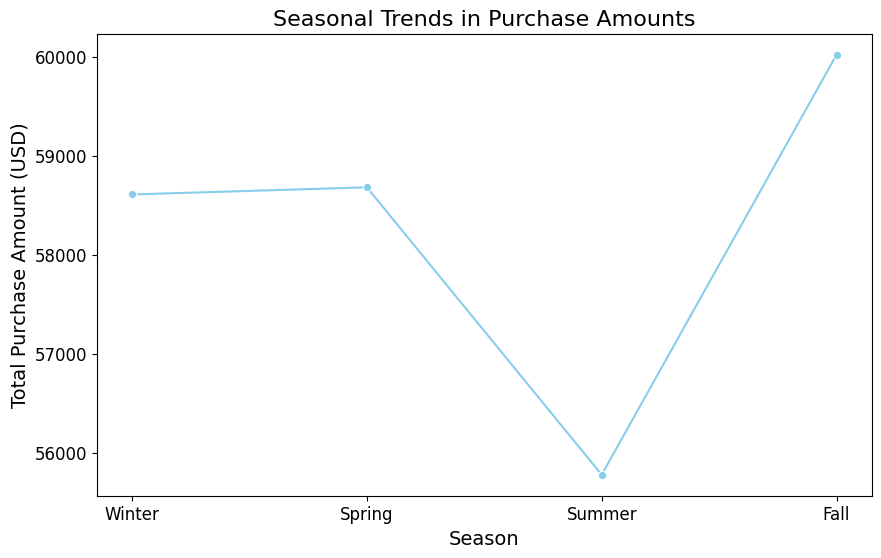

In [59]:
# Visualization: Seasonal Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='Purchase Amount (USD)', data=seasonal_sales, marker='o', color='skyblue')
plt.title('Seasonal Trends in Purchase Amounts', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [60]:
# Step 3: Analyze impact of promotions
# Calculate sales with and without discounts/promo codes
discount_sales = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()
promo_sales = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index()

<ipython-input-61-4c9065be599b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_sales, palette='coolwarm')


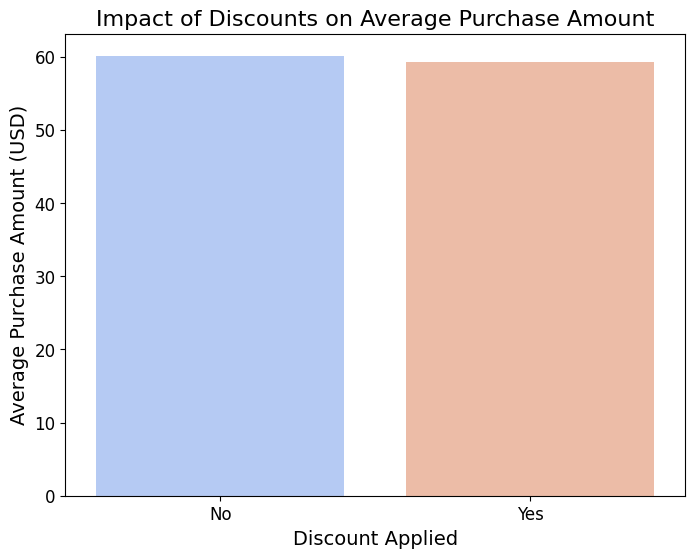

In [61]:
# Visualization: Impact of Discounts
plt.figure(figsize=(8, 6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_sales, palette='coolwarm')
plt.title('Impact of Discounts on Average Purchase Amount', fontsize=16)
plt.xlabel('Discount Applied', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-62-11aa9eead87f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_sales, palette='coolwarm')


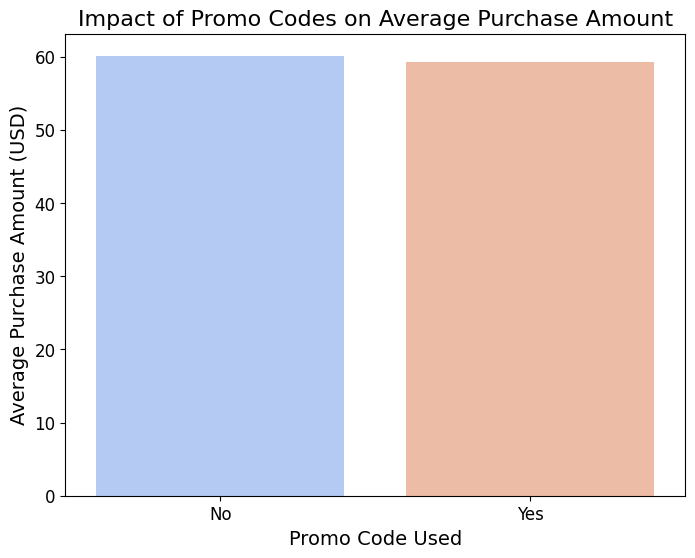

In [62]:
# Visualization: Impact of Promo Codes
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_sales, palette='coolwarm')
plt.title('Impact of Promo Codes on Average Purchase Amount', fontsize=16)
plt.xlabel('Promo Code Used', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Best-Selling Product Categories**

The analysis reveals that Clothing is the most frequently purchased product category, followed by Accessories and Footwear.

**Seasonal Trends**

Seasonal trend analysis reveals a notable pattern. Sales are highest during Fall and Winter, suggesting a surge in purchases during the colder months. Sales are relatively consistent in the remaining seasons.

**Impact of Promotions**

The business has been applying promotions to the dataset. Here is the result after analyzing whether promotions are effective.

**Discount**

When discounts are applied, the average purchase amount is 59.35. Without discount, it is 60.47

**Promo Code**

When promo code is applied, the average purchase amount is 59.37. Without promo code, it is 60.36

There is not much difference in average purchase amount, suggesting that promotions are not effective.


# **Actionable Business Insights**
**Inventory Management:**

Allocate inventory strategically, stocking up on warm-weather apparel and accessories during the summer and autumn.

**Customized Marketing:**

Implement location-specific promotions, such as offering shipping discounts to customers in certain areas.

**Promotion Optimization:**

Because the promotions has not been effective, consider restructuring promotional strategies to better align with customer preferences or increase the percentage discount to increase sales.

Test different promotional offers or incentives to drive more sales. Consider using free shipping instead of promo codes.

**Supply Chain Efficiency:**

Work closely with suppliers and logistics partners to ensure timely delivery of products, particularly during peak seasons and promotional events.

# 4. Which factors influence repeat purchases and customer retention?

In [63]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

In [64]:
# Map frequency terms to numeric values
frequency_mapping = {
    'Daily': 30,  # Assuming 30 days in a month
    'Weekly': 4,  # 4 weeks in a month
    'Bi-Weekly': 2,  # Every two weeks
    'Fortnightly': 2,  # Same as Bi-Weekly
    'Monthly': 1,
    'Quarterly': 0.33,  # Once every three months
    'Annually': 0.083,  # Once a year
    'Every 3 Months': 0.33,
    'Every 6 Months': 0.167,
}

# Replace frequency terms with numeric values in the dataset
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)

In [65]:
# Step 1: Identify customers who purchase frequently
# Calculate average purchase frequency for each customer
avg_purchase_freq = df.groupby('Customer ID')['Frequency of Purchases'].mean().reset_index()
avg_purchase_freq.columns = ['Customer ID', 'Average Purchase Frequency']

# Set a threshold for frequent purchasers (e.g., top 25% of customers)
threshold = avg_purchase_freq['Average Purchase Frequency'].quantile(0.75)

# Identify frequent purchasers based on the threshold
frequent_purchasers = avg_purchase_freq[avg_purchase_freq['Average Purchase Frequency'] >= threshold]

In [66]:
# Print summary statistics
print(f"Number of customers: {len(df['Customer ID'].unique())}")
print(f"Number of frequent purchasers: {len(frequent_purchasers)}")

Number of customers: 3900
Number of frequent purchasers: 1628


In [67]:
# Step 2: Examine the relationship between subscription status and retention
# Calculate the average purchase frequency for subscribers and non-subscribers
subscription_frequency = df.groupby('Subscription Status')['Frequency of Purchases'].mean().reset_index()
subscription_frequency.columns = ['Subscription Status', 'Average Purchase Frequency']

In [68]:
# Print results
print("\nAverage Purchase Frequency based on Subscription Status:")
print(subscription_frequency)


Average Purchase Frequency based on Subscription Status:
  Subscription Status  Average Purchase Frequency
0                  No                    1.348678
1                 Yes                    1.399145


<ipython-input-69-c044198eefb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription Status', y='Average Purchase Frequency', data=subscription_frequency, palette='coolwarm')


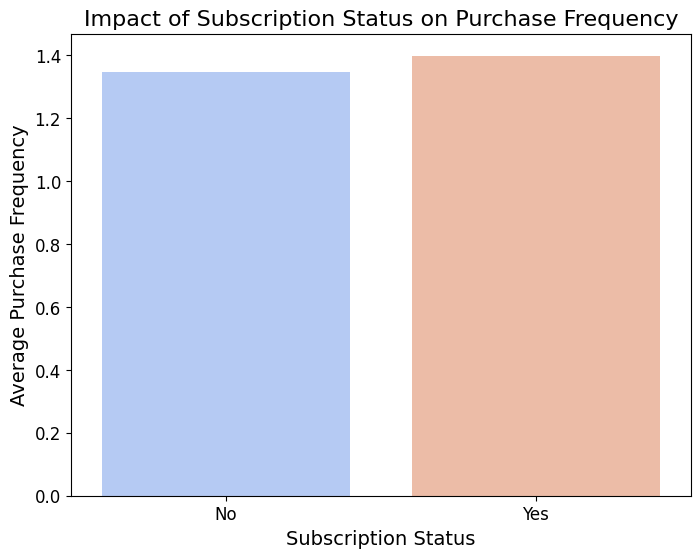

In [69]:
# Step 3: Visualize the relationship between subscription status and retention
plt.figure(figsize=(8, 6))
sns.barplot(x='Subscription Status', y='Average Purchase Frequency', data=subscription_frequency, palette='coolwarm')
plt.title('Impact of Subscription Status on Purchase Frequency', fontsize=16)
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Average Purchase Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Business Insights: Factors Influencing Repeat Purchases and Customer Retention**
This analysis aims to uncover key factors that influence repeat purchases and customer retention.

# **Key Findings**
**Frequent Purchasers:**

The analysis identifies a subset of customers who purchase more frequently than others.

These frequent purchasers are crucial for driving revenue through repeat business.

**Subscription Status Impact:**

Subscribers tend to have higher average purchase frequencies compared to non-subscribers.

This suggests that subscription programs effectively encourage more frequent purchasing behavior.

# **Actionable Business Implications**
**Prioritize Focus on Customer Acquisition for Subscriptions:**

Emphasize marketing efforts on acquiring more subscribers, as they contribute significantly to revenue through higher purchase frequencies.

**Implement Loyalty Programs:**

Offer incentives or rewards specifically targeting frequent purchasers to maintain their loyalty and encourage continued high-frequency purchasing behavior.

**Personalized Marketing Campaigns:**

Develop targeted promotions based on the purchasing frequency of customers, offering tailored offers or early access to new products for high-frequency buyers.

**Improve Customer Experience:**

Continuously monitor customer feedback and reviews to identify areas for improvement in product quality or service, ensuring satisfaction among both subscribers and non-subscribers.

# 5. How do discounts and promo codes affect purchasing patterns?

In [70]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

In [71]:
# Drop rows with missing values in 'Customer ID' column
df = df.dropna(subset=['Customer ID'])

# Convert 'Customer ID' column to integer type
df['Customer ID'] = df['Customer ID'].astype(int)

<ipython-input-72-a0d45c31c867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_impact, palette='viridis')


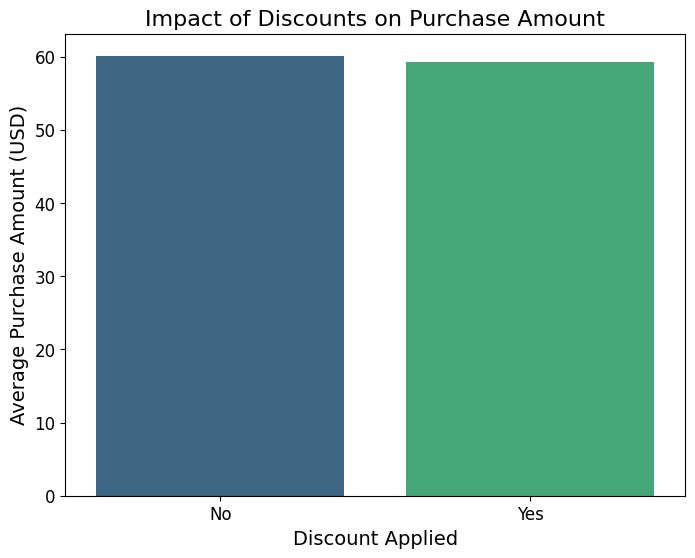

In [72]:
# Step 1: Impact of Discounts on Purchase Amount
discount_impact = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

# Visualization for Discount Impact
plt.figure(figsize=(8, 6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=discount_impact, palette='viridis')
plt.title('Impact of Discounts on Purchase Amount', fontsize=16)
plt.xlabel('Discount Applied', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-73-1f6e1a4e726a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_impact, palette='magma')


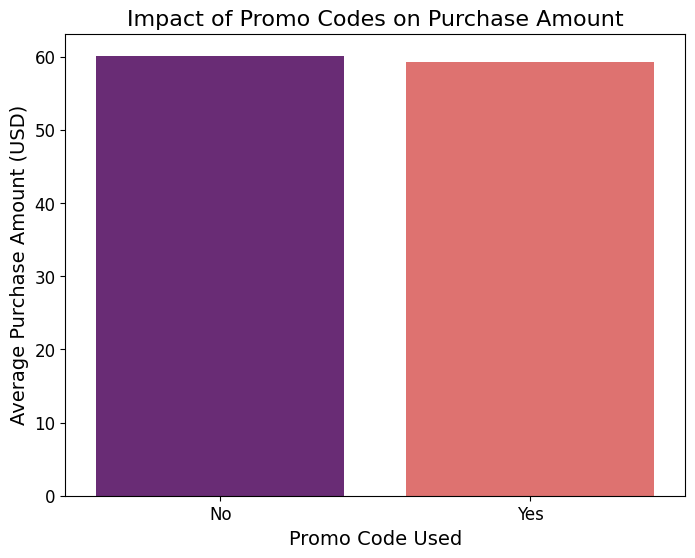

In [73]:
# Step 2: Impact of Promo Codes on Purchase Amount
promo_impact = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index()

# Visualization for Promo Code Impact
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_impact, palette='magma')
plt.title('Impact of Promo Codes on Purchase Amount', fontsize=16)
plt.xlabel('Promo Code Used', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-74-e2ad19c5d498>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Promo Code Used')


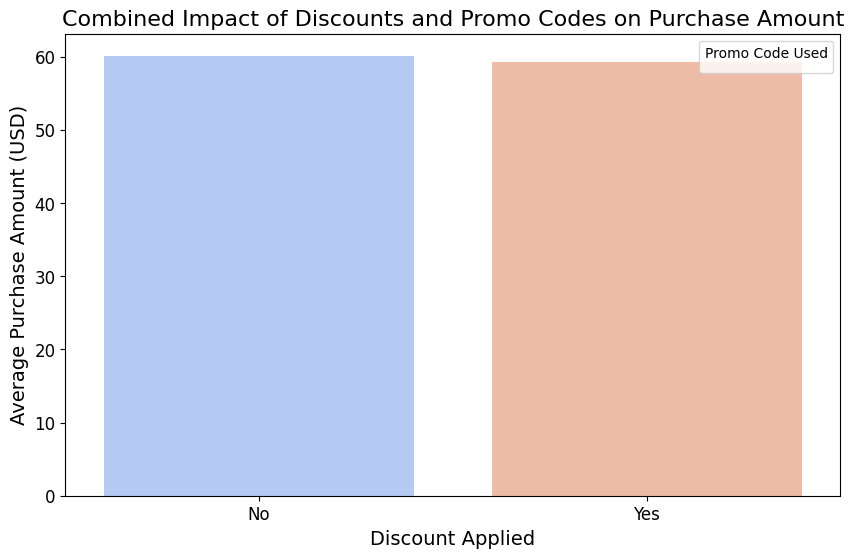

In [74]:
# Step 3: Combined Impact of Discounts and Promo Codes
combined_impact = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().reset_index()

# Visualization for Combined Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', hue='Promo Code Used', data=combined_impact, palette='coolwarm')
plt.title('Combined Impact of Discounts and Promo Codes on Purchase Amount', fontsize=16)
plt.xlabel('Discount Applied', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Promo Code Used')
plt.show()

# **Business Insights: Impact of Discounts and Promo Codes**

This analysis explores the impact of discounts and promo codes on purchasing behavior to inform effective marketing strategies.

# **Key Findings**
**Discounts:**

When discounts are applied, customers tend to spend slightly more on average compared to when no discount is used.

However, the difference in average purchase amounts is minimal, suggesting that discounts may not significantly influence spending habits.

**Promo Codes:**

Similar to discounts, promo codes show a slight increase in average purchase amounts but do not drastically alter spending patterns.

The use of promo codes might encourage more frequent purchases or attract price-sensitive customers.

# **Actionable Business Implications**
**Optimize Discount Strategies:**

Consider restructuring discount offers to better align with customer preferences or increase the percentage discount for higher-value items.

**Targeted Promotions:**

Use targeted marketing campaigns focusing on specific product categories where promotions have shown effectiveness in increasing sales volume or attracting new customers.

**Alternative Incentives:**

Explore alternative incentives such as free shipping or loyalty rewards that might be more appealing than traditional discounts or promo codes.

**Segment-Based Marketing:**

Segment your customer base based on their responsiveness to promotions and tailor marketing efforts accordingly.

# 6. What payment methods are preferred by different customer segments?

In [75]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

<ipython-input-76-fb6ee43d94db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette='viridis')


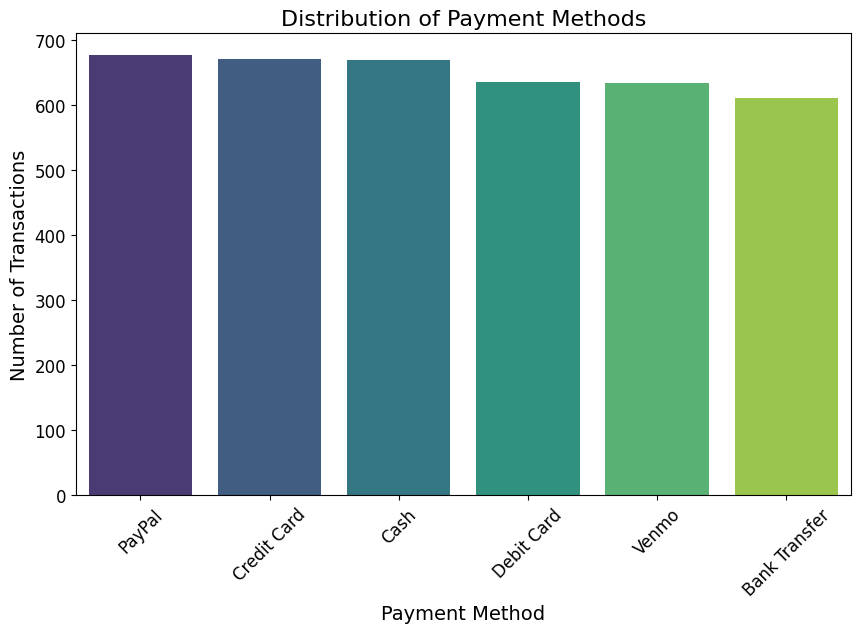

In [76]:
# Step 1: Analyze the distribution of payment methods
payment_method_distribution = df['Payment Method'].value_counts()

# Visualization for Payment Method Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette='viridis')
plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-77-9c985bb8aba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Purchase Amount (USD)', data=payment_method_spending, palette='magma')


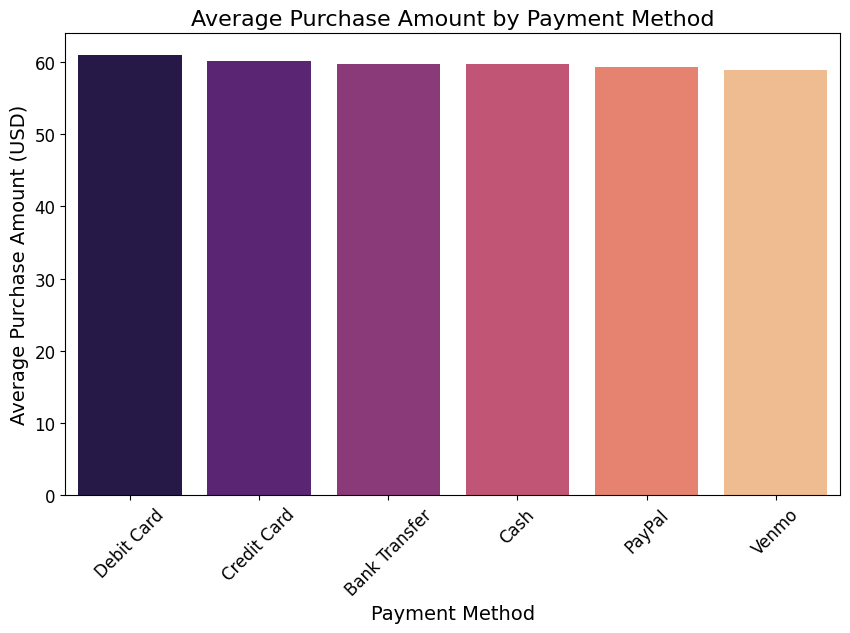

In [77]:
# Step 2: Determine whether a payment method correlates with spending habits
# Calculate average purchase amount for each payment method
payment_method_spending = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

# Sort payment methods by average spending
payment_method_spending = payment_method_spending.sort_values(by='Purchase Amount (USD)', ascending=False)

# Visualization for Payment Method Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', data=payment_method_spending, palette='magma')
plt.title('Average Purchase Amount by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [78]:
# Step 3: Investigate different age demographics' preferred payment method
# Drop rows with missing values in 'Customer ID' column
df = df.dropna(subset=['Customer ID'])

In [79]:
# Convert 'Customer ID' column to integer type
df['Customer ID'] = df['Customer ID'].astype(int)

In [80]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 75]  # Define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Labels for bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [81]:
# Payment Method Distribution by Age Group
age_payment_distribution = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')

<ipython-input-81-b7fd9ad729ee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment_distribution = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')


In [82]:
# Calculate percentages within each age group
age_payment_distribution['Total'] = age_payment_distribution.groupby('Age Group')['Count'].transform('sum')
age_payment_distribution['Percentage'] = (age_payment_distribution['Count'] / age_payment_distribution['Total']) * 100

<ipython-input-82-398f850cdd73>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment_distribution['Total'] = age_payment_distribution.groupby('Age Group')['Count'].transform('sum')


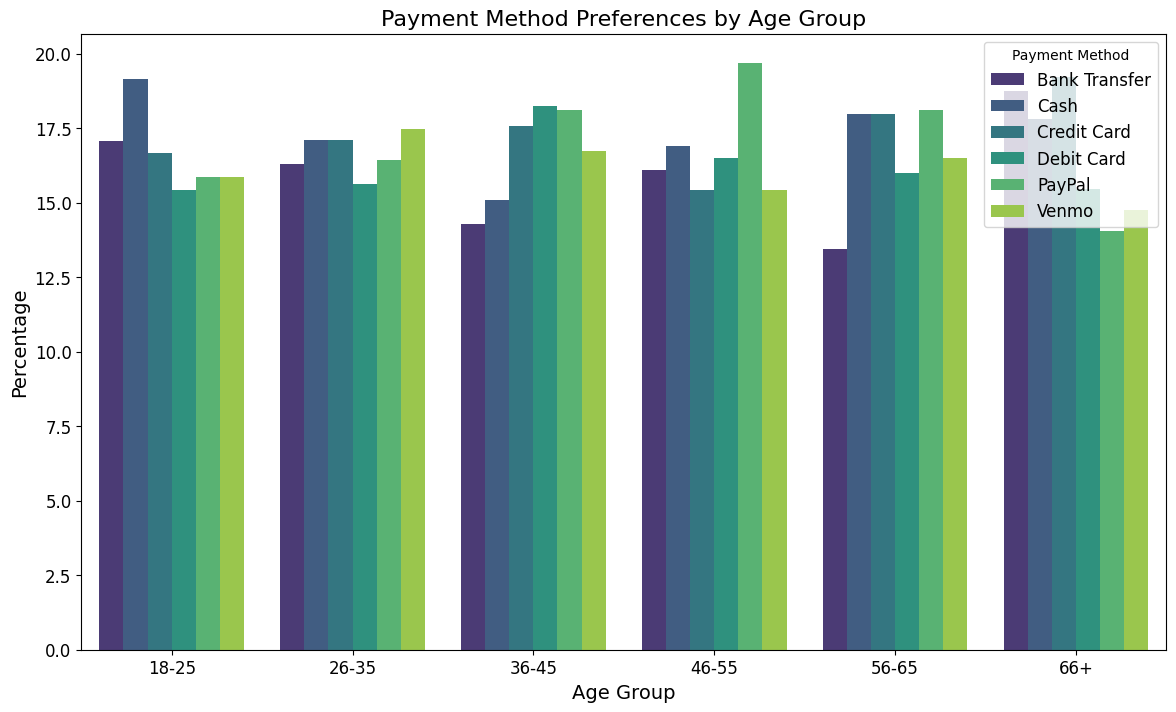

In [83]:
# Visualization for Payment Method Distribution by Age Group
plt.figure(figsize=(14, 8))
sns.barplot(x='Age Group', y='Percentage', hue='Payment Method', data=age_payment_distribution, palette='viridis')
plt.title('Payment Method Preferences by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Payment Method', fontsize=12)
plt.show()

# Key Findings
**1. Payment Method Distribution:**

The most popular payment methods are PayPal, credit cards and cash.

Credit Card and PayPal are used more frequently compared to other methods.

**2. Age-Based Payment Preferences:**

Younger customers of (36-45 years old or below) favor modern payment methods like Venmo and PayPal for their convenience.

Older customers (56+) tend to stick with traditional methods cash or bank transfer due to being more familiar with these transaction methonds.

# Actionable Business Implications
**1. Tailor Payment Options:**

Offer a variety of payment methods to cater to the diverse preferences of your customer base.

Prioritize credit card and PayPal acceptance while also including Venmo for younger demographics and Cash options where feasible.

**2. Marketing Strategies:**

Promote specific payment methods to corresponding age groups in marketing campaigns.

For younger audiences, highlight the ease and security of mobile payment options.

For older customers, focus on the established reliability of credit cards and cash transactions.

**3. Optimize User Experience:**

Ensure a seamless checkout process regardless of the chosen payment method.

Provide clear instructions and support for each payment option to encourage usage and reduce cart abandonment.



# 7. What shipping options are most used, and do they correlate with purchase frequency or basket size?

In [85]:
# Load the cleaned dataset
file_path = "cleaned_shopping_behavior.csv"
df = pd.read_csv(file_path)

<ipython-input-86-39dbfbac219a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_option_popularity.index, y=shipping_option_popularity.values, palette='viridis')


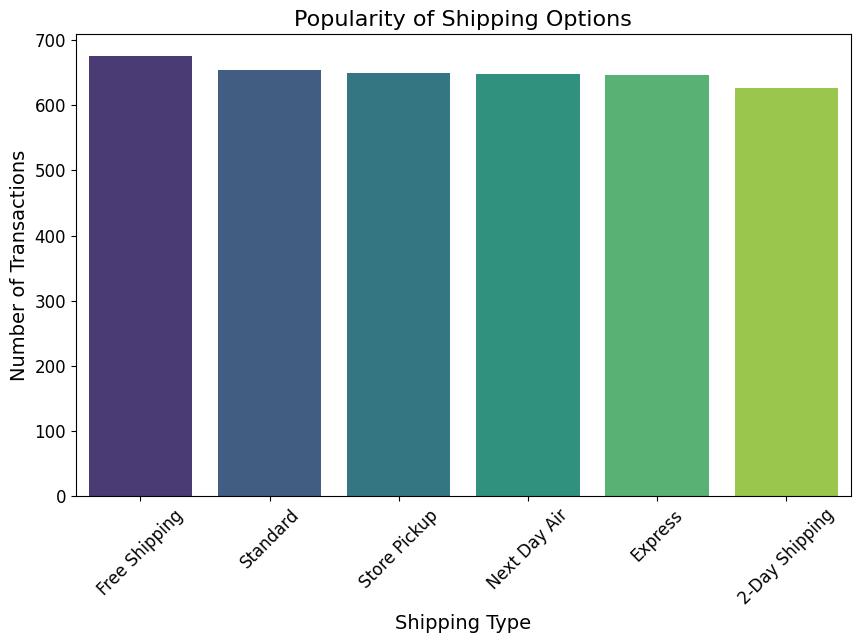

In [86]:
# Step 1: Identify the most popular shipping options
shipping_option_popularity = df['Shipping Type'].value_counts()

# Visualization for Shipping Option Popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_option_popularity.index, y=shipping_option_popularity.values, palette='viridis')
plt.title('Popularity of Shipping Options', fontsize=16)
plt.xlabel('Shipping Type', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [87]:
# Step 2: Analyze if fast shipping encourages larger purchases
# Calculate average purchase amount for each shipping type
shipping_spending = df.groupby('Shipping Type')['Purchase Amount (USD)'].mean().reset_index()

# Sort shipping types by average purchase amount
shipping_spending = shipping_spending.sort_values(by='Purchase Amount (USD)', ascending=False)

<ipython-input-88-4c3cc81749ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping Type', y='Purchase Amount (USD)', data=shipping_spending, palette='magma')


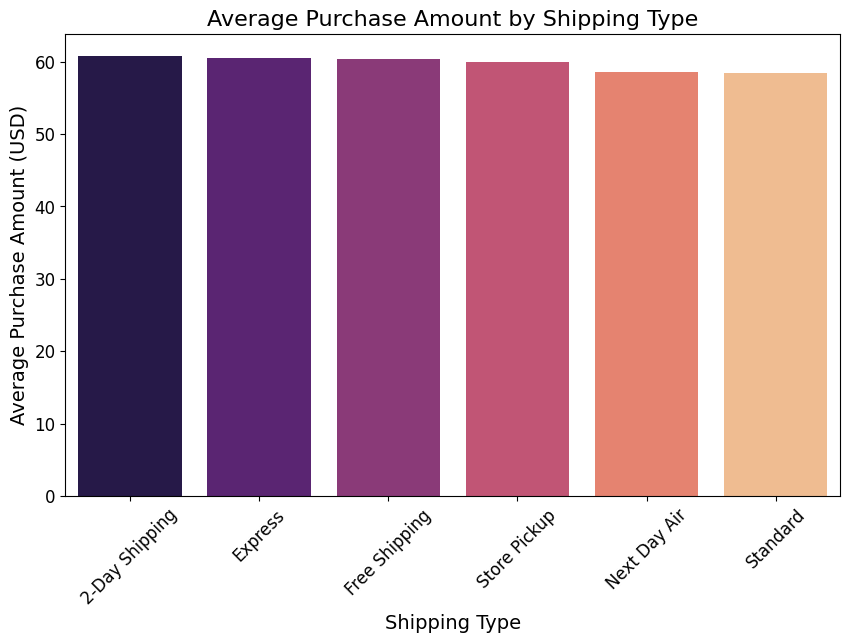

In [88]:
# Visualization for Average Purchase Amount by Shipping Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Type', y='Purchase Amount (USD)', data=shipping_spending, palette='magma')
plt.title('Average Purchase Amount by Shipping Type', fontsize=16)
plt.xlabel('Shipping Type', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [91]:
# Step 3: Analyze the correlation between shipping type and purchase frequency
# Map frequency terms to numeric values
frequency_mapping = {
    'Daily': 30,  # Assuming 30 days in a month
    'Weekly': 4,  # 4 weeks in a month
    'Bi-Weekly': 2,  # Every two weeks
    'Fortnightly': 2,  # Same as Bi-Weekly
    'Monthly': 1,
    'Quarterly': 0.33,  # Once every three months
    'Annually': 0.083,  # Once a year
    'Every 3 Months': 0.33,
    'Every 6 Months': 0.167,
}

In [92]:
# Replace frequency terms with numeric values in the dataset
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)

In [93]:
# Group by shipping type and calculate the average purchase frequency
shipping_frequency = df.groupby('Shipping Type')['Frequency of Purchases'].mean().reset_index()

In [94]:
# Sort shipping types by average purchase frequency
shipping_frequency = shipping_frequency.sort_values(by='Frequency of Purchases', ascending=False)

<ipython-input-95-06fda4cff176>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping Type', y='Frequency of Purchases', data=shipping_frequency, palette='coolwarm')


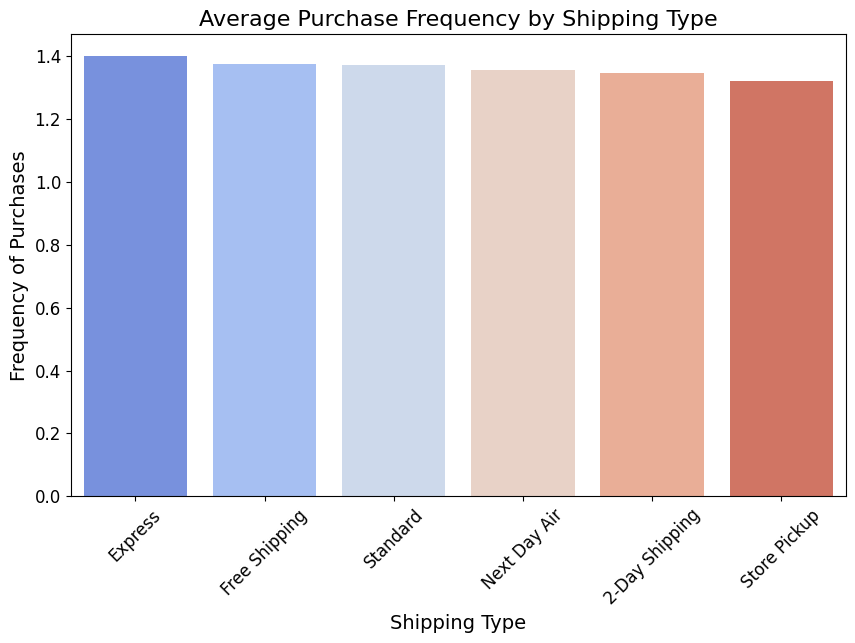

In [95]:
# Visualization for Shipping Type vs. Purchase Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Type', y='Frequency of Purchases', data=shipping_frequency, palette='coolwarm')
plt.title('Average Purchase Frequency by Shipping Type', fontsize=16)
plt.xlabel('Shipping Type', fontsize=14)
plt.ylabel('Frequency of Purchases', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Key Findings
**Popularity of Shipping Options:**

**Free Shipping** is the most popular choice among customers.

**Standard Shipping** and **Store Pickup** are also frequently used, reflecting customer preferences for cost-effective and convenient options.

**Average Purchase Amount by Shipping Type:**

**2-Day Shipping** has the highest average purchase amount.

**Express Shipping** also shows a higher average purchase amount compared to other options.

Faster shipping options tend to be associated with larger basket sizes, indicating that customers are willing to spend more for quicker delivery.

**Average Purchase Frequency by Shipping Type:**

**Express Shipping** has the highest average purchase frequency

**Free Shipping** and **Standard Shipping** are also associated with higher purchase frequencies.

Customers who prefer faster shipping options tend to make repeat purchases more often.

# Actionable Business Implications
**Shipping Promotion and Advertisement:**

Emphasize 2-Day Shipping as it yields the highest average purchase amount.

Showcase the benefits of speedy shipping so that the business can generate more revenues.

**Optimize Shipping Costs and Pricing:**

Evaluate the costs associated with different shipping options, and assess where the business can invest more.

**Tailor Shipping to Different Customer Segments:**

Consider offering discounts to customers who are willing to receive free and standard shipping options.

**Incentivize Higher Purchase Amounts:**

Offer discounts or exclusive perks for customers who meet a minimum purchase amount.